In [1]:
## imports

## DS & visuals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")

## dattes and house functions
import datetime as dt
import eda_functions as eda

## Stats 
import scipy
from scipy import stats
## For encoding
#from sklearn.preprocessing import LabelEncoder

## Linear Regression
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

##
import warnings
warnings.filterwarnings("ignore")


In [2]:
path = '~/Scripts/py_ex/LearnPython-main/files/cars.xlsx'

In [3]:
df = pd.read_excel(path)

In [4]:
df.head(3)

,Height,Length,Width,Engine Driveline,Engine Type,Engine Hybrid,Number of Forward Gears,Engine Transmission,Fuel City mpg,Fuel Type,Fuel Highway mpg,Classification,ID,Make,Model Year,Year,Horsepower,Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Height                   5076 non-null   int64 
 1   Length                   5076 non-null   int64 
 2   Width                    5076 non-null   int64 
 3   Engine Driveline         5076 non-null   object
 4   Engine Type              5076 non-null   object
 5   Engine Hybrid            5076 non-null   bool  
 6   Number of Forward Gears  5076 non-null   int64 
 7   Engine Transmission      5076 non-null   object
 8   Fuel City mpg            5076 non-null   int64 
 9   Fuel Type                5076 non-null   object
 10  Fuel Highway mpg         5076 non-null   int64 
 11  Classification           5076 non-null   object
 12  ID                       5076 non-null   object
 13  Make                     5076 non-null   object
 14  Model Year               5076 non-null  

In [6]:
result = eda.siftdatatype(df)
nums = result['nums']
objs = result['objs']

In [7]:
df[nums].describe()

,Height,Length,Width,Number of Forward Gears,Fuel City mpg,Fuel Highway mpg,Year,Horsepower,Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


In [8]:
eda.empirical(df, 'Horsepower')

,Horsepower,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.66,0.680,0.020
Frac of the values within +/- 2 SD from the mean,0.96,0.950,0.010
Frac of the values within +/- 3 SD from the mean,0.99,0.997,0.007


               Horsepower
observations  5076.000000
minimun        100.000000
maximun        638.000000
mean           270.499409
variance      9080.858128
skewness         0.722488
kurtosis         0.698932


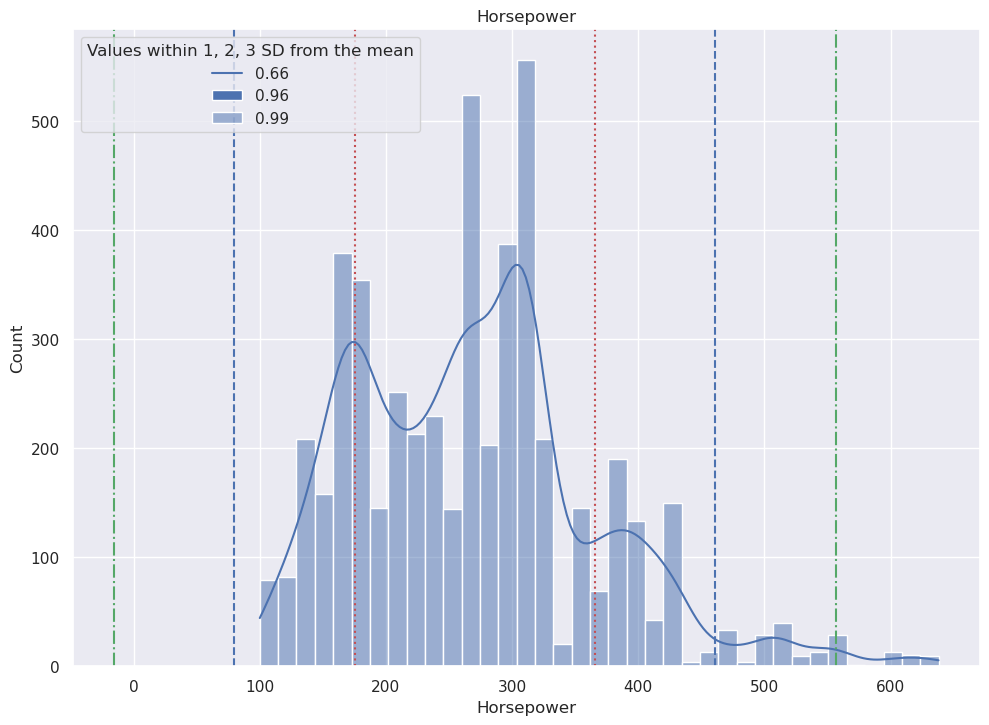

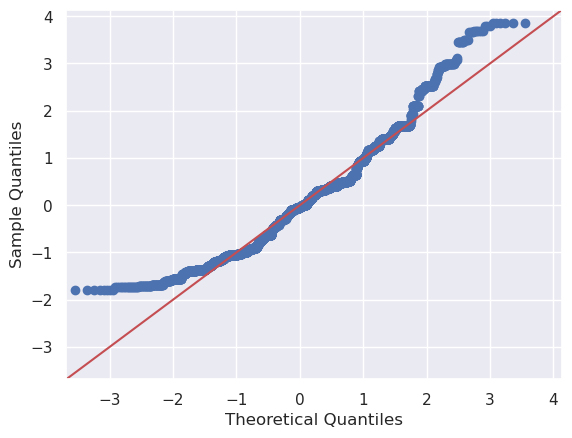

In [9]:
print(eda.estadisticas(df, 'Horsepower'))
eda.distribution(df, 'Horsepower')

In [10]:
eda.empirical(df, 'Torque')

,Torque,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.59,0.680,0.090
Frac of the values within +/- 2 SD from the mean,0.98,0.950,0.030
Frac of the values within +/- 3 SD from the mean,0.99,0.997,0.007


                    Torque
observations   5076.000000
minimun          98.000000
maximun         774.000000
mean            272.707250
variance      10024.680783
skewness          0.691402
kurtosis          0.904630


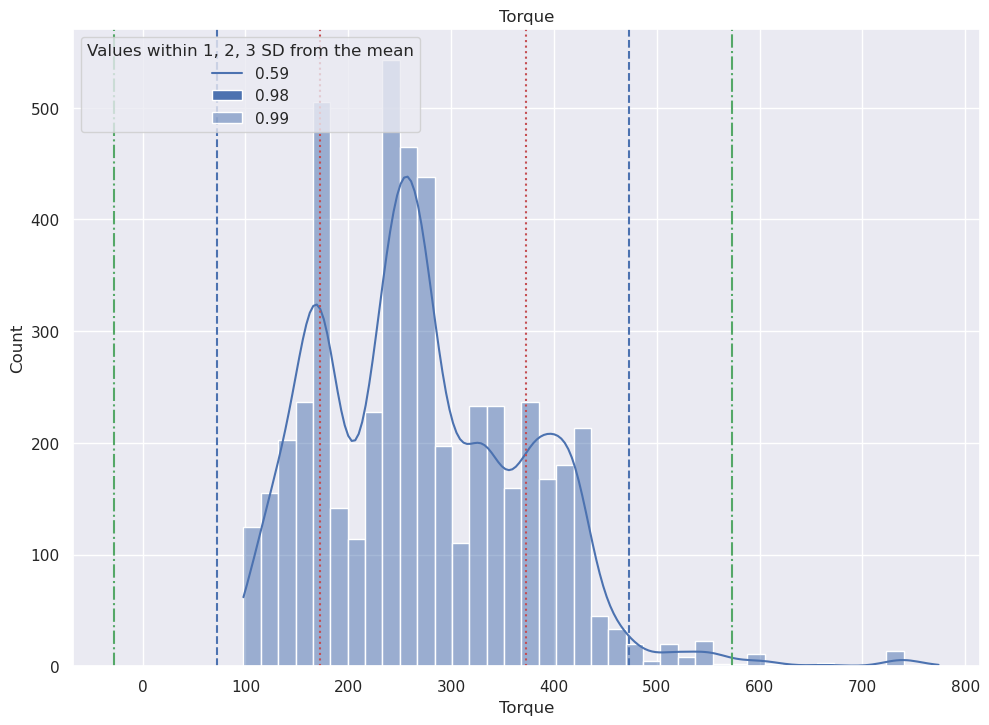

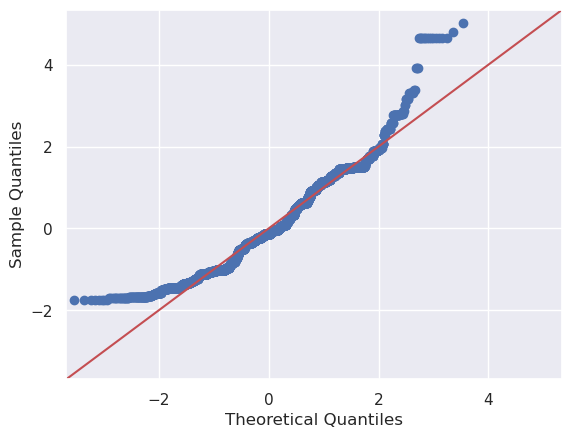

In [11]:
print(eda.estadisticas(df, 'Torque'))
eda.distribution(df, 'Torque')

In [12]:
eda.empirical(df, 'Fuel Highway mpg')

,Fuel Highway mpg,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.73,0.680,0.050
Frac of the values within +/- 2 SD from the mean,0.99,0.950,0.040
Frac of the values within +/- 3 SD from the mean,1.00,0.997,0.003


              Fuel Highway mpg
observations       5076.000000
minimun              11.000000
maximun             223.000000
mean                 24.125493
variance             42.097943
skewness              5.862638
kurtosis            172.793068


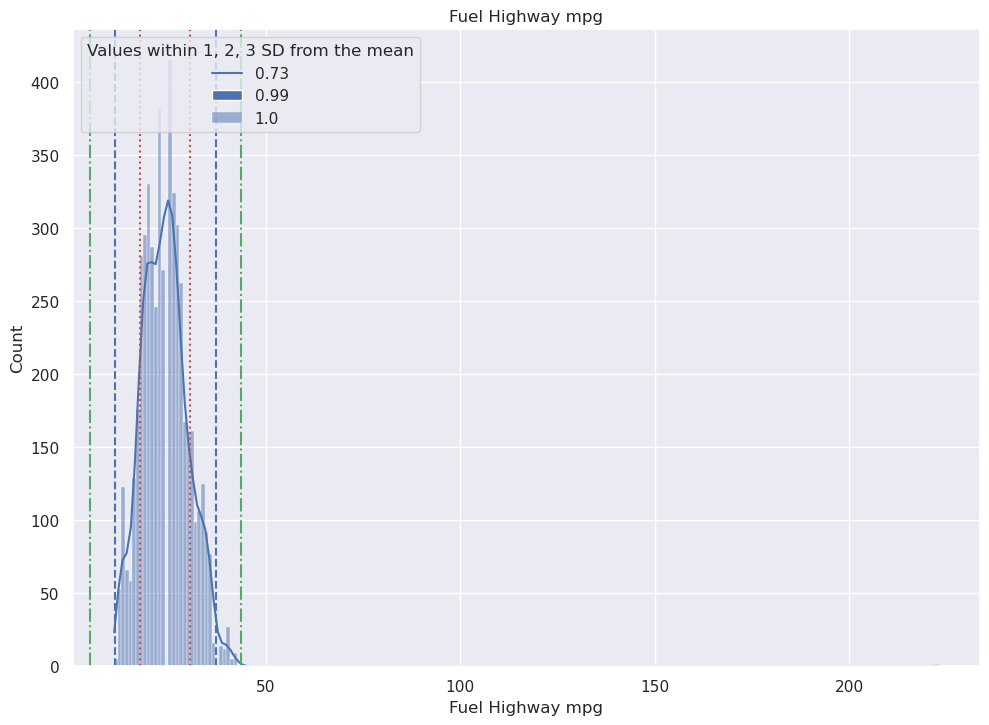

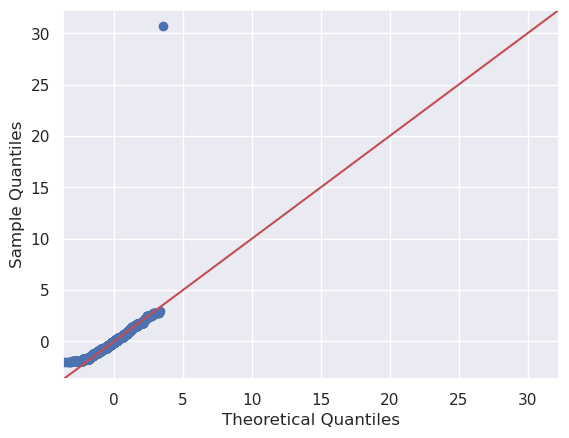

In [13]:
print(eda.estadisticas(df, 'Fuel Highway mpg'))
eda.distribution(df, 'Fuel Highway mpg')

In [14]:
eda.empirical(df, 'Fuel City mpg')

,Fuel City mpg,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.70,0.680,0.020
Frac of the values within +/- 2 SD from the mean,0.96,0.950,0.010
Frac of the values within +/- 3 SD from the mean,1.00,0.997,0.003


              Fuel City mpg
observations    5076.000000
minimun            8.000000
maximun           38.000000
mean              17.275808
variance          20.065787
skewness           0.493284
kurtosis           0.152277


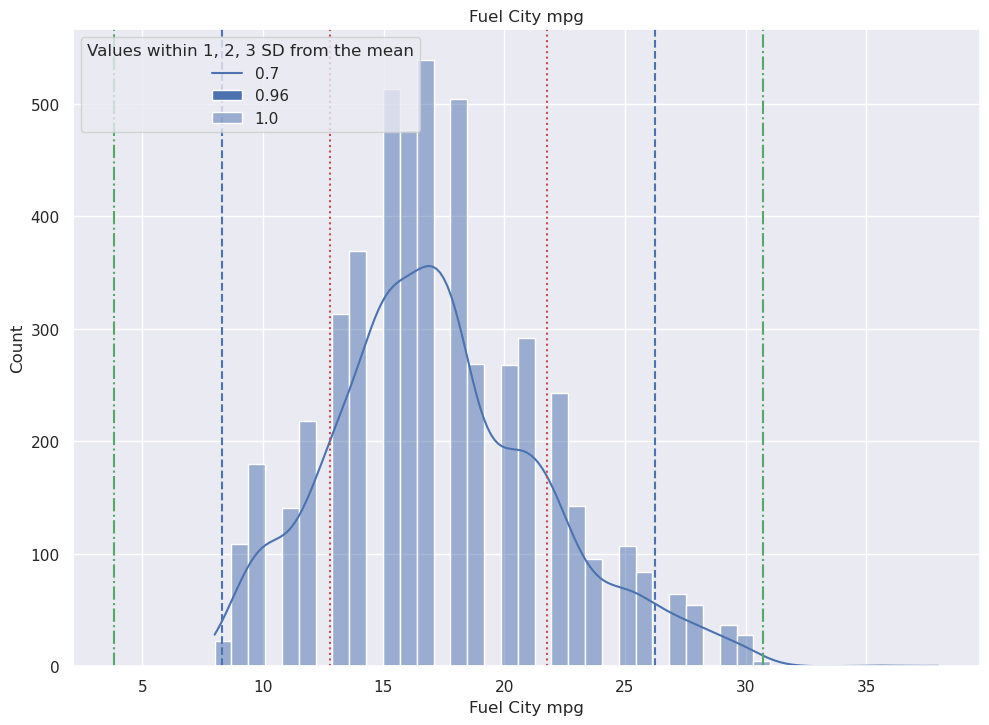

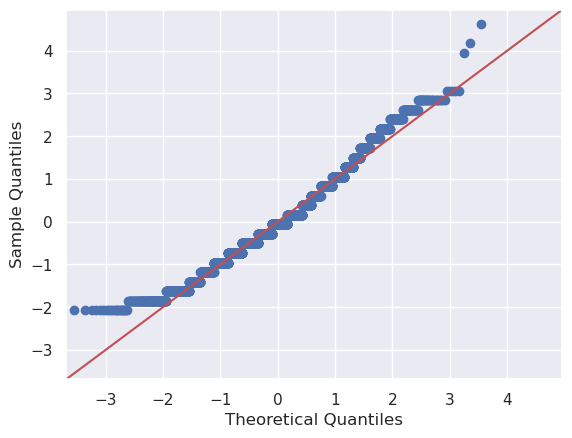

In [15]:
print(eda.estadisticas(df, 'Fuel City mpg'))
eda.distribution(df, 'Fuel City mpg')

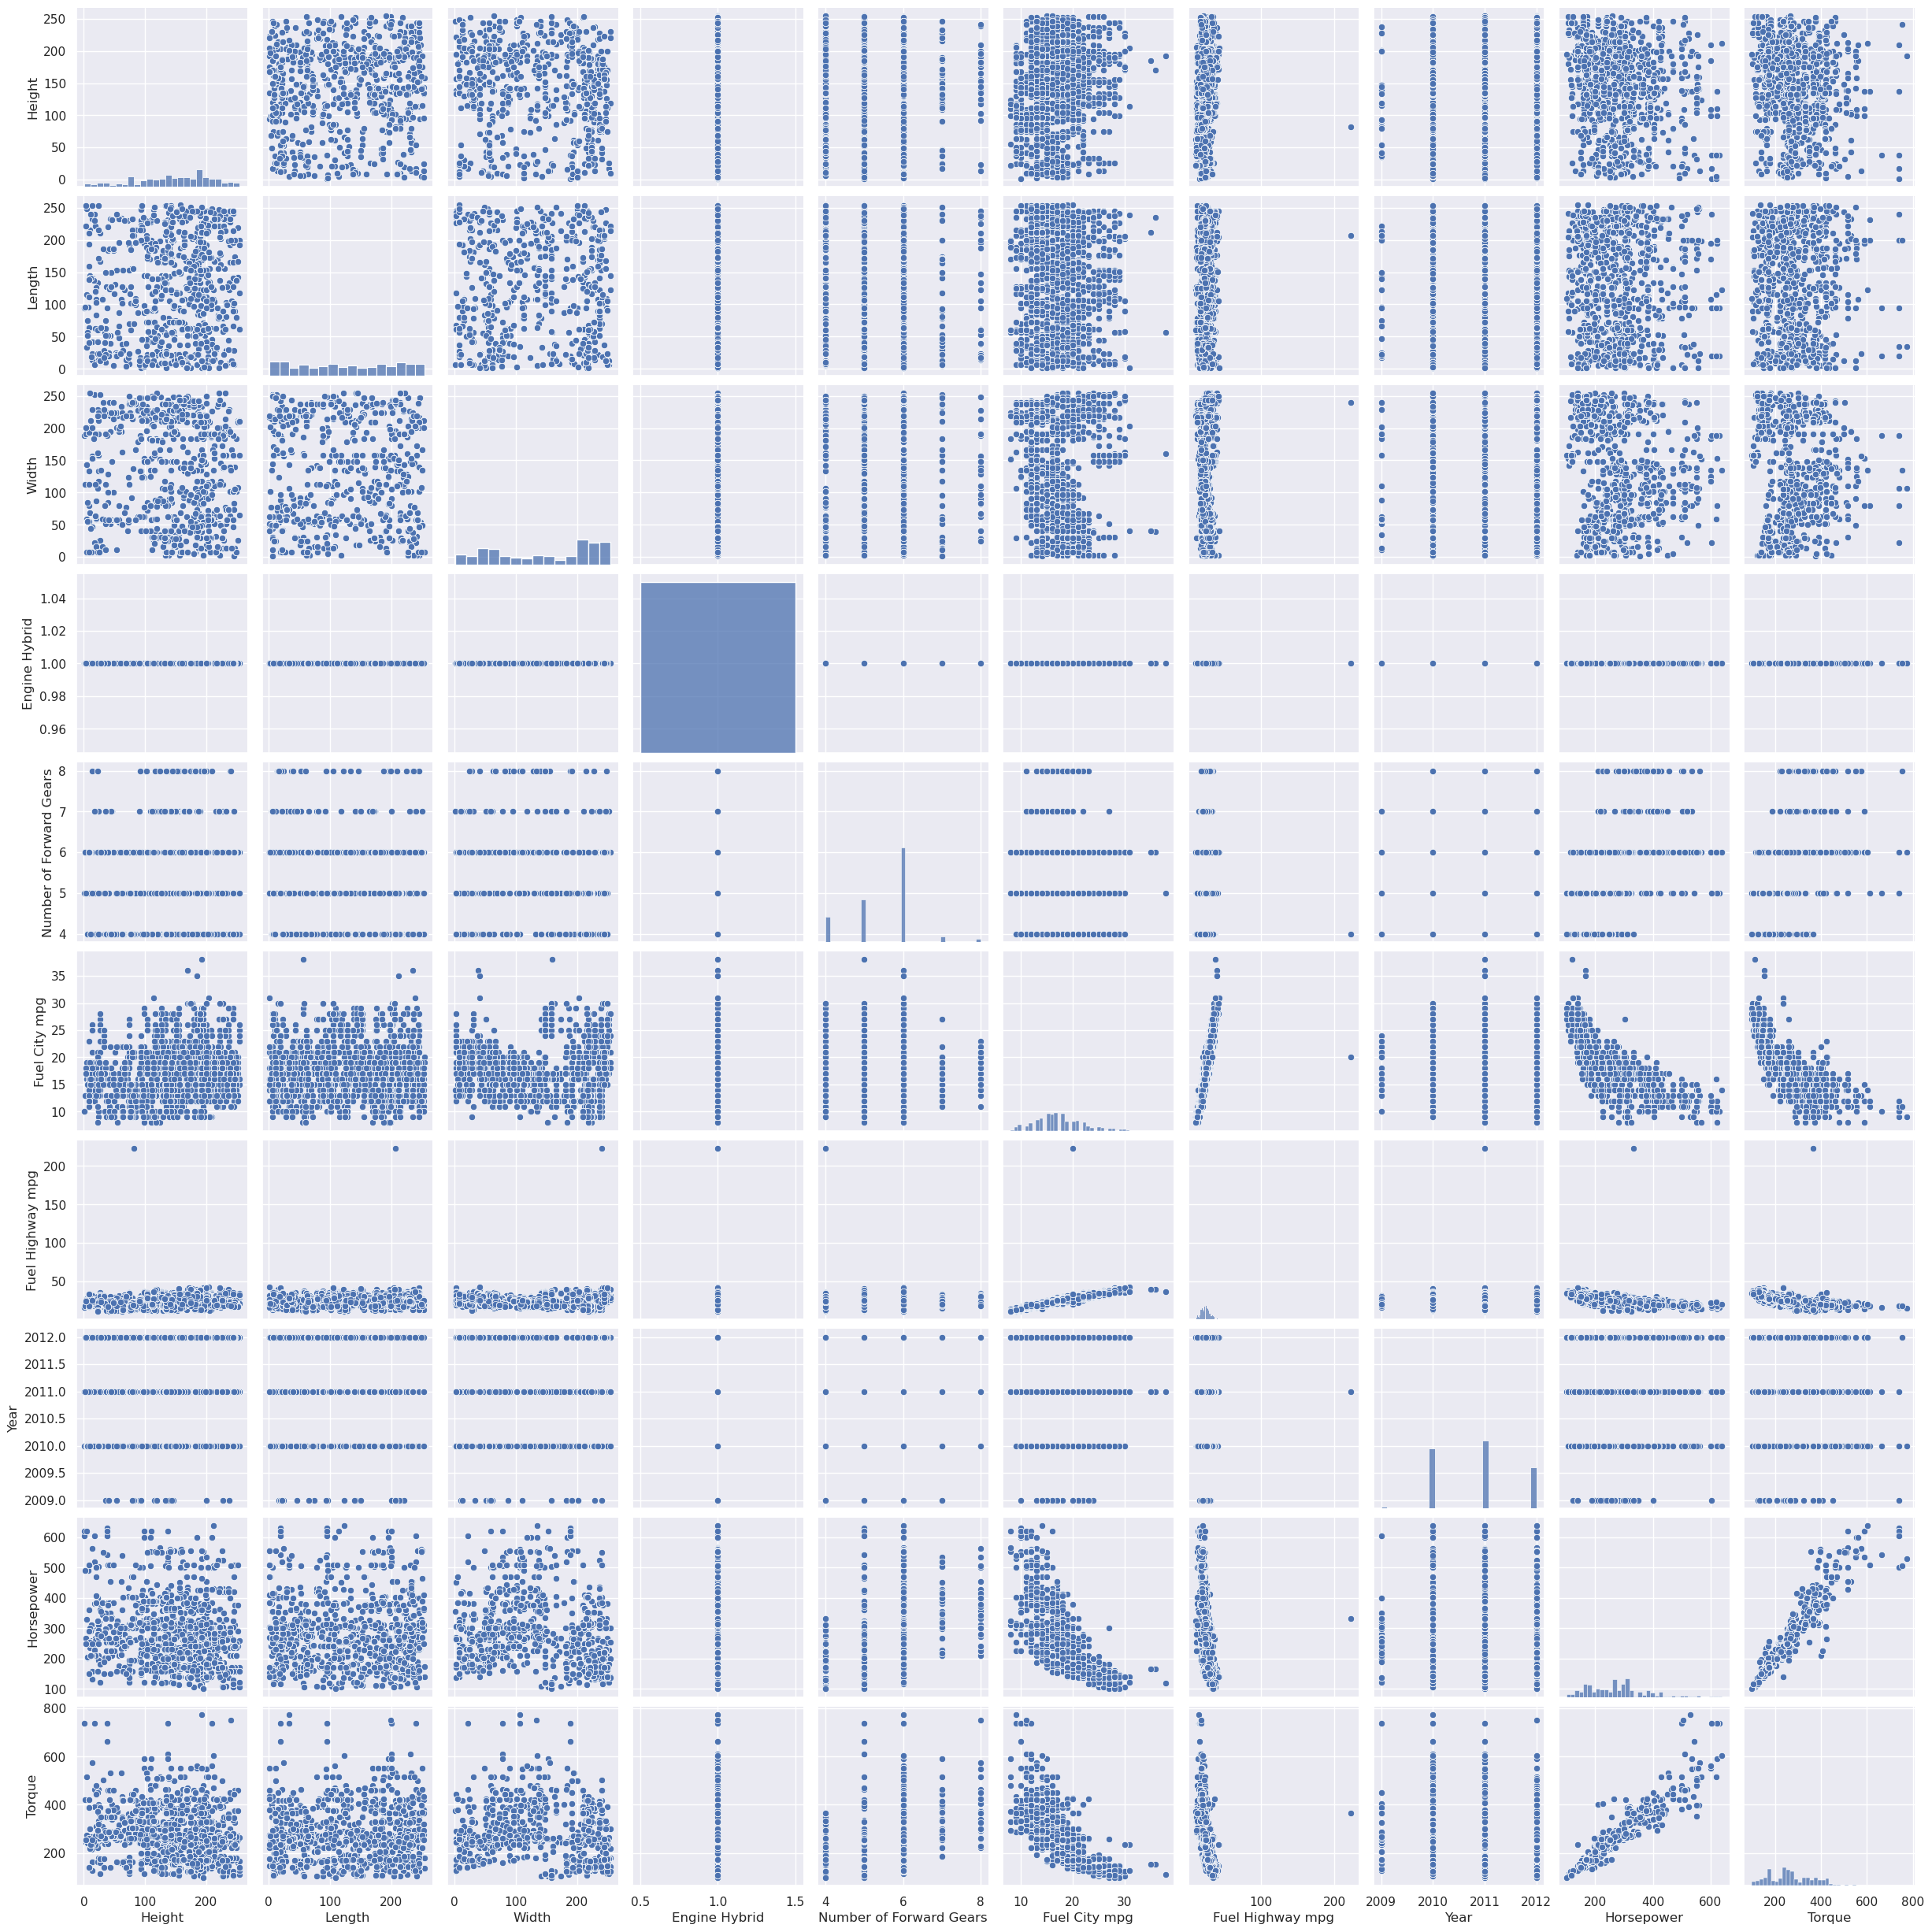

In [16]:
sns.pairplot(df)

In [17]:
## `Horsepower` and `Torque` 
## seems to have linear relationship.

Text(0, 0.5, 'torque')

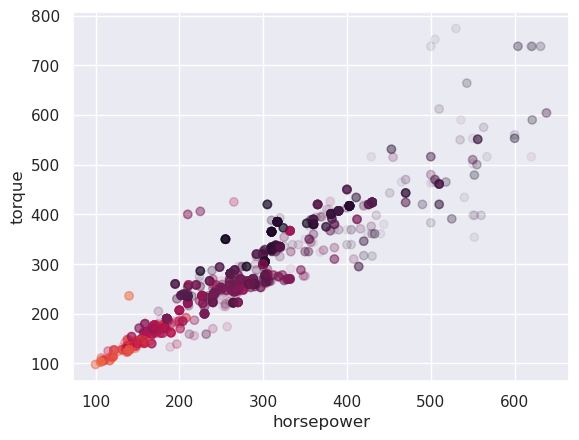

In [21]:
## 
X = df['Horsepower']
y = df['Torque']
c = df['Fuel City mpg']

fig1, ax1 = plt.subplots()
ax1.scatter(X, y, c=c, alpha=0.07)
ax1.set_xlabel('horsepower')
ax1.set_ylabel('torque')

## Building a model

 We `add_constant(X)` function, which adds a column of constants to the `X` dataframe, 
 before passing that into the OLS() function. This is a structural requirement 
 so that the ordinary least squares estimation can be performed properly


In [37]:
## structural requirement and defining model, also fiting the data to the model.
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [38]:
## Displaying ressults
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Torque   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                 3.736e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:03:15   Log-Likelihood:                -25194.
No. Observations:                5076   AIC:                         5.039e+04
Df Residuals:                    5074   BIC:                         5.041e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0327      1.463      4.124      0.0

### **Notes**:
 
 * The estimated coeficients are statistically significant as their p-values are less than 5x10exp-3 
 * We can expect than `Torque` will increase as the independent variable `Horsepower` increase.
 * The sign of the coeficients are positives.
 * `0.9859` indicates how much variance in `Torque` is explained by `Horsepower`
 * The `Intercept` is 6.0327
 

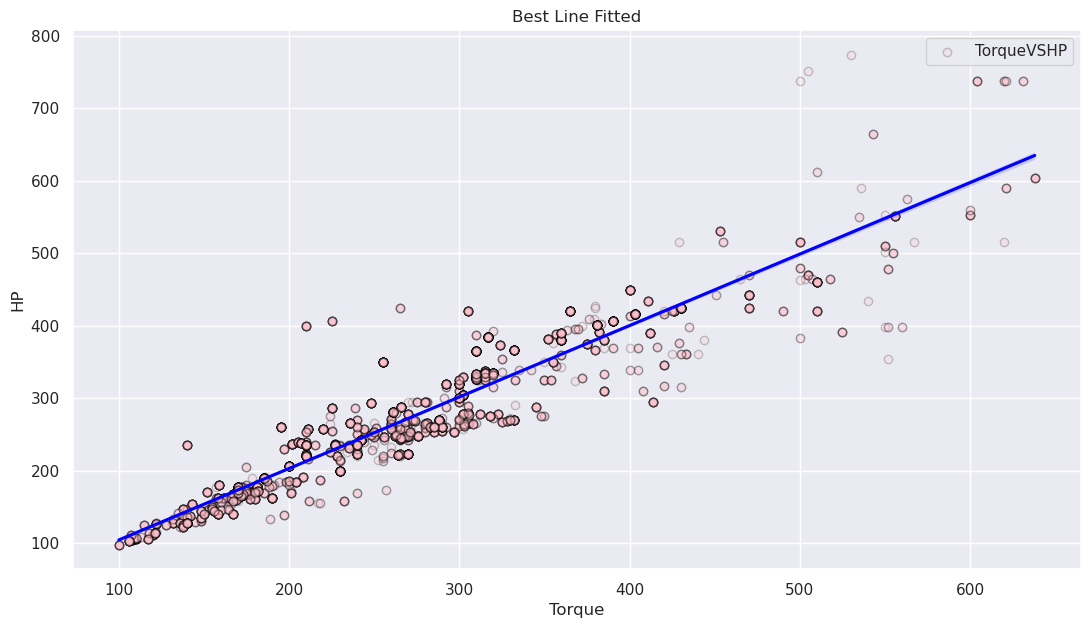

In [64]:
fig2, ax2 = plt.subplots(figsize=(13, 7))
ax2.scatter(df['Horsepower'], y, c='pink', edgecolor='black', alpha=0.2, label= 'TorqueVSHP')
sns.regplot(x=df['Horsepower'], y=y, data=df, scatter=False, ci=95, 
    fit_reg = True, color = 'blue')
ax2.set_title('Best Line Fitted')
ax2.set_xlabel("Torque")
ax2.set_ylabel("HP")
ax2.legend();

Assumptions for simple linear regression, in no particular order:

1. Linearity
2. Normality
3. Independent observations
4. Homoscedasticity

You already checked the linearity assumption by creating the scatterplot matrix. 
The independent observations assumption is more about data collection.
So we can check off assumptions 1 and 3.

The normality and homoscedasticity assumptions focus on the distribution of errors. 
Thus, I can only check these assumptions after you have constructed the model (done). 
To check: Residuals, as an approximation of the errors.


## Check Normality Assumption
---

Histogram of the residuals, and

Another way to check the normality function is to create a quantile-quantile or Q-Q plot. Recall that if the residuals are normally distributed, you would expect a straight diagonal line going from the bottom left to the upper right of the Q-Q plot. You can create a Q-Q plot by using the `qqplot` function from the `statsmodels.api` package.

The Q-Q plot shows a similar pattern to the histogram, where the residuals are mostly normally distributed, except at the ends of the distribution.

In [77]:
fitted_values = model.predict(X)

In [78]:
residuals = model.resid

In [79]:
residuals_ = pd.DataFrame(residuals)

In [81]:
eda.empirical(residuals_, residuals_.columns[0])

,0,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.80,0.680,0.120
Frac of the values within +/- 2 SD from the mean,0.96,0.950,0.010
Frac of the values within +/- 3 SD from the mean,0.98,0.997,0.017


                         0
observations  5.076000e+03
minimun      -1.962274e+02
maximun       2.481080e+02
mean         -9.102114e-14
variance      1.198816e+03
skewness      8.758631e-01
kurtosis      5.521682e+00


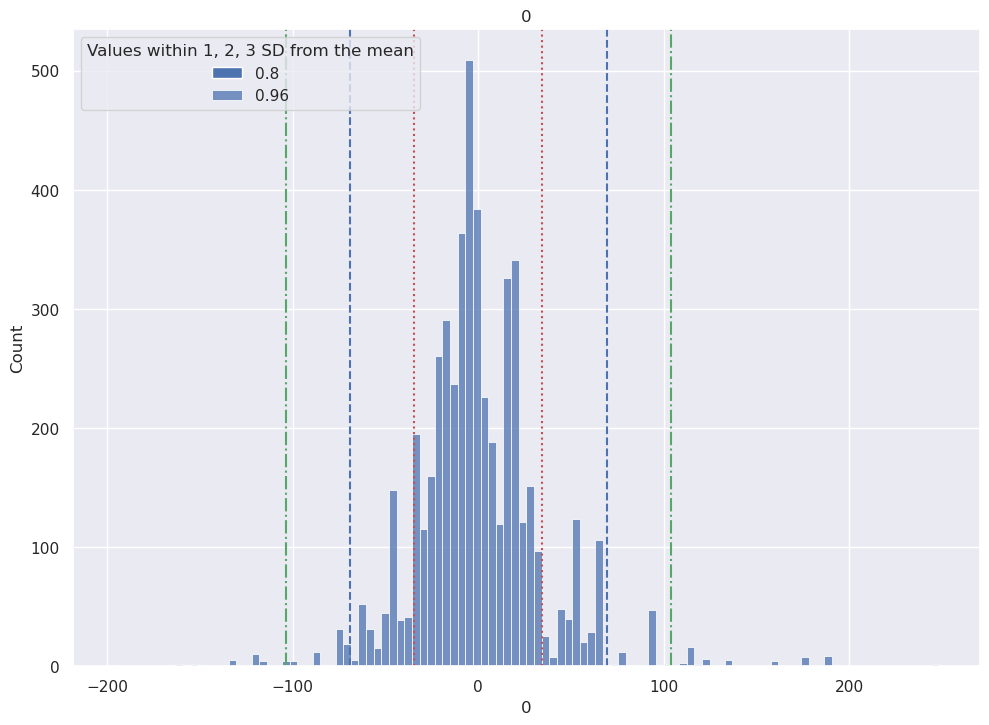

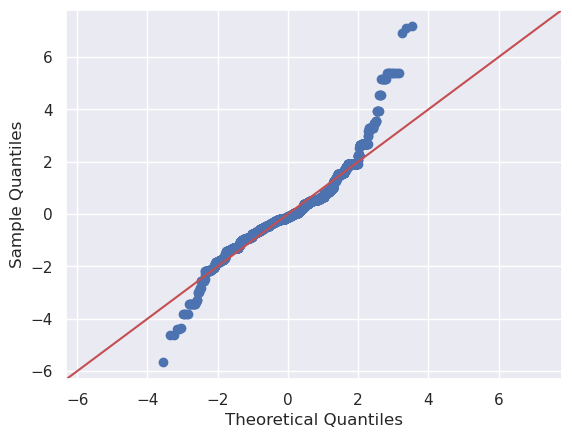

In [82]:
print(eda.estadisticas(residuals_, residuals_.columns[0]))
eda.distribution(residuals_, residuals_.columns[0])

## Check the homoscedasticity assumption
lastly, we have to check the homoscedasticity assumption. To check the homoscedasticity assumption, we may create a scatterplot of the fitted values and residuals. 

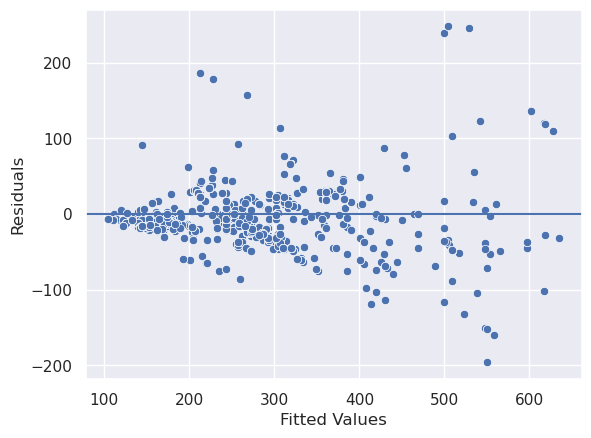

In [83]:
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()